Requirements: Need to include sympy as project dependency to import/run/use npendulum

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting from NPendulum Environment

In Explauto, an *environment* implements the physical properties of the interaction between the robot body and the environment in which it evolves. Explauto come with several sensorimotor systems available from the [environment package](http://flowersteam.github.io/explauto/explauto.environment.html). To learn how to set an environment, look at the notebook [Setting Environments](https://github.com/flowersteam/explauto/blob/master/notebook/setting_environments.ipynb).

In [1]:
from explauto.environment import environments
print('Available environments: {}'.format(environments.keys()))

simple_arm
pendulum
npendulum
pypot
No module named 'explauto.environment.pypot'
Available environments: dict_keys(['simple_arm', 'pendulum', 'npendulum'])


We will use the npendulum environment for this tutorial. It consists in the simulation of a multiple pendulum with $n+1$ nodes, aiming to model a string. The first node is the one which undergoes the input force.

This environment comes with a predefined configuration, named *default*.

In [2]:
env_cls, env_configs, _ = environments['npendulum']
print('Available configurations for the simple arm environment: {}'.format(env_configs.keys()))

Available configurations for the simple arm environment: dict_keys(['default'])


In the case of the npendulum environment, a configuration must defines the following values:
* nb_joints (number $n$ of the joints)
* m_mins and m_maxs (bounds of the motor space)
* s_mins ans s_maxs (bounds of the sensory space)
* length_ratio (length ratio from one segment to the following one)
* noise (gaussian noise added in the sensor space)

For more advanced settings, please look at the [npendulum environment documentation](http://flowersteam.github.io/explauto/explauto.environment.html#explauto.environment.npendulum.npendulum.NPendulumEnvironment).

Then we create the Environment instance.

In [5]:
config = env_configs['default']

print('Default configuration for the npendulum:')
for config_key, value in config.items():
    print('\t{}: {}'.format(config_key, value))

environment = env_cls(**config)

Default configuration for the npendulum:
	n: 5
	m_mins: [-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
	m_maxs: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
	s_mins: [-450.   -1.]
	s_maxs: [450.   1.]
	noise: 0.02


Each environment has an [update](http://flowersteam.github.io/explauto/explauto.environment.html#explauto.environment.environment.Environment.update) method, we take as argument a motor command vector $m$. It computes $m\_bounds$, the command $m$ bounded according to the configuration used (m_mins, m_maxs values), then computes the corresponding sensory effect vector $s$ and returns the position and velocity of the last effector.

$m$ is a list of ten elements that are the amplitude of each step function.

In [7]:
from math import pi
m = [0.01,0.06,-0.05,0.01,0.,0.,0.,0.,-0.1,0.01]
print(environment.update(m))

TypeError: cannot unpack non-iterable Particle object

Then, we add the noise :

In [9]:
s = environment.compute_sensori_effect(m)
print(s)

TypeError: cannot unpack non-iterable Particle object

The simple arm environment also comes with few methods to visualize the arm shape for a given motor configuration.

The first one plot the position of the end effector at the end of the movement.

NameError: name 's' is not defined

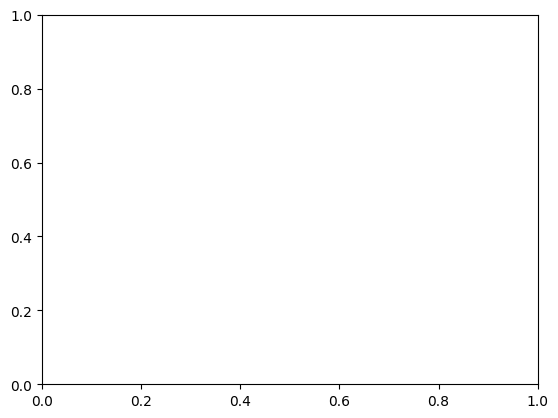

In [13]:
ax = plt.axes()
environment.plot_s(ax, s)

The second one computes and plots the position of the end effector from $m$. In this example, we generate goals and plot them.

Populating the interactive namespace from numpy and matplotlib


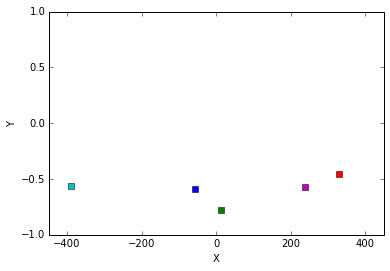

In [14]:
motor_configurations = environment.random_motors(n=5)
ax = plt.axes()
for m in motor_configurations:
    environment.plot_and_compute(ax, m)

The third one plots the whole npendulum. The squared point is the end effector.

Populating the interactive namespace from numpy and matplotlib


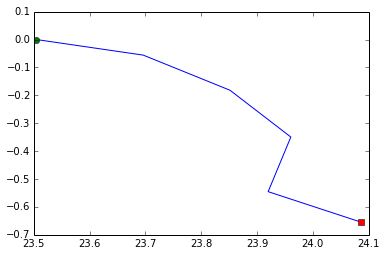

In [25]:
motor_configurations = environment.random_motors(n=1)
ax = plt.axes()
for m in motor_configurations:
    environment.plot_npendulum(ax, m)

The last one generates .png files that contains the whole pendulum image, in order to create a video. The computation may take few minutes.

In [16]:
m = [0.01,0.06,-0.05,0.01,0.,0.,0.,0.,-0.1,0.01]
environment.animate_pendulum(m)

Populating the interactive namespace from numpy and matplotlib
